In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
df = pd.read_excel('weight_height.xlsx')


In [12]:
df.head()

,Weight,Height
0,45,150
1,50,155
2,55,160
3,60,165
4,65,170


Text(0, 0.5, 'Height')

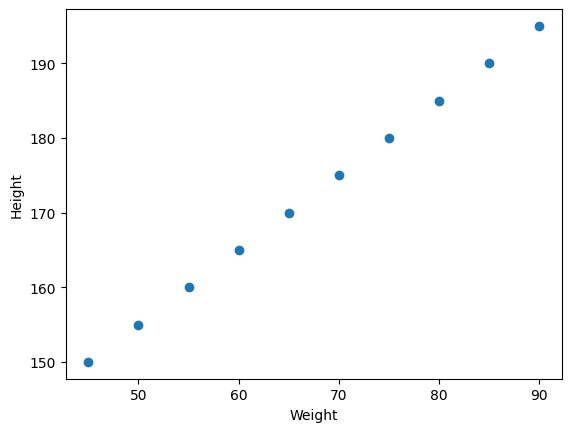

In [13]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [14]:
df.corr()

,Weight,Height
Weight,1.0,1.0
Height,1.0,1.0


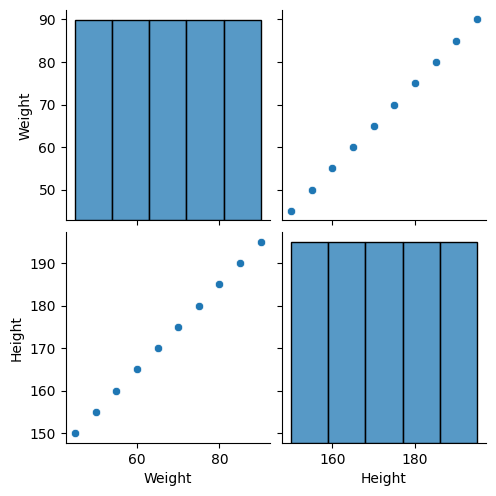

In [15]:
import seaborn as sns
sns.pairplot(df)

In [16]:
df.head()

,Weight,Height
0,45,150
1,50,155
2,55,160
3,60,165
4,65,170


In [24]:
X=df[['Weight']]
y=df['Height'] 
X.head()

,Weight
0,45
1,50
2,55
3,60
4,65


In [22]:
X_series=df['Weight']
np.array(X_series).shape

(10,)

In [25]:
np.array(y).shape

(10,)

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
X_train.shape

(7, 1)

In [29]:
##standardization
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[-1.54230764],
       [ 0.89553347],
       [-0.84578161],
       [ 1.5920595 ],
       [-0.14925558],
       [-0.4975186 ],
       [ 0.54727045]])

In [32]:
X_test=scaler.transform(X_test)

In [33]:
X_test

array([[ 1.24379649],
       [-1.19404463],
       [ 0.19900744]])

In [34]:
##apply linear regression
from sklearn.linear_model import LinearRegression

In [38]:
regression=LinearRegression(n_jobs=-1)

In [39]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [42]:
print("Coefficient or slope",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or slope [1.]
Intercept:  104.99999999999999


TypeError: LinearModel.predict() missing 1 required positional argument: 'X'

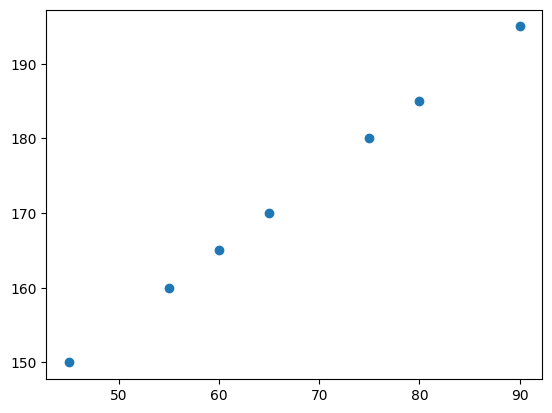

In [43]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict())

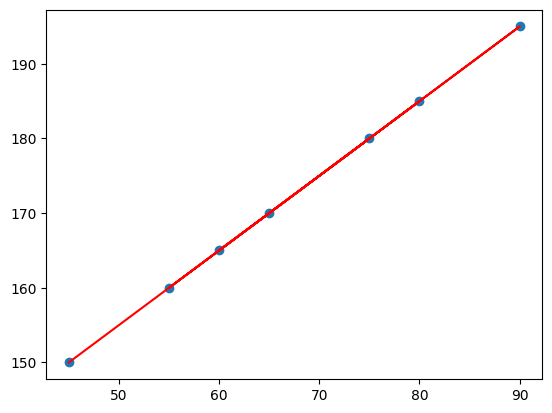

In [44]:
# Scatter plot for training data
plt.scatter(X_train, y_train)

# Plot the regression line using predicted values
plt.plot(X_train, regression.predict(X_train), color='red')  # Pass X_train to predict

plt.show()


In [45]:
y_pred=regression.predict(X_test)

c:\Users\aojha\OneDrive\Attachments\python\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4836.036798272442
68.25041356748251
69.54161918069238


In [49]:
from sklearn.metrics import r2_score

In [50]:
score=r2_score(y_test,y_pred)
print(score)

-22.52666550510918


In [56]:
!pip install statsmodels


  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 4.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 4.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 4.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 3.9 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 4.0 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.8 MB 4.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 4.1 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 4.2 MB/s eta 0:00:01
   -------------------------------

In [57]:
import statsmodels.api as sm


In [58]:
model=sm.OLS(y_train,X_train).fit()

In [59]:
prediction=model.predict(X_test)
print(prediction)

[ 3.1038376  -2.9796841   0.49661402]


In [60]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              365.4
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                    1.33e-06
Time:                        22:39:43   Log-Likelihood:                         -31.556
No. Observations:                   7   AIC:                                      65.11
Df Residuals:                       6   BIC:                                      65.06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\aojha\OneDrive\Attachments\python\venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [62]:
regression.predict(scaler.transform([[72]]))

c:\Users\aojha\OneDrive\Attachments\python\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aojha\OneDrive\Attachments\python\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([105.33831264])